In [1]:
import sys
sys.path.insert(0, '../')

import src.utils as util
%load_ext autoreload
%autoreload 2

import pandas as pd

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from solartime import SolarTime
from datetime import date

from pytz import timezone

In [9]:
import src.utils as util
import constants as const

We are removing the data before sunrise and after sunset

In [3]:
data = pd.read_pickle('../input/timeseries')

In [4]:
len(data)

105984

In [11]:
point_per_day = data.groupby(data.index.date).count()[['grid']]
point_per_day.loc[point_per_day['grid']!=288]

,grid
2020-04-05,300
2020-10-04,276


In [12]:
len(data.loc[data.index.date == pd.Timestamp('2020-10-04')].index.tolist())

276

## Section 1 - Take values only between 7am - 8pm

In [5]:
_5min = data.resample('5min').mean()
point_per_day = _5min.groupby(_5min.index.date).count()[['grid']]
point_per_day.loc[point_per_day['grid']!=288]

,grid
2020-10-04,276


In [6]:
len(_5min)

105984

In [10]:
# temp_df = data.reset_index()
len(_5min.loc[_5min.index.date == pd.Timestamp('2020-10-04')].index.tolist())

288

In [14]:
_5min.groupby(_5min.index.date).count()['grid'].values

array([288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288,
       288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 288, 28

In [18]:
_5min.index[100].hour

8

In [27]:
temp_df = _5min.reset_index()
solar_times = []

for val in temp_df['date_str']:
    if val.hour >= 7 and val.hour <= 20:
        solar_times.append(True)
    else:
        solar_times.append(False)

In [28]:
temp_df['solar_time'] = solar_times
temp_df.head()

,date_str,grid,tline_1,tline_2,substation1,substation2,substation3,substation4,6010,6014,...,143824576,368424646,1428227531,2040495184,1893337300,2117861717,1941427679,1708098535,456209269,solar_time
0,2020-02-13 00:00:00,16.88,12.34,4.54,6.93,5.41,4.54,0.00,6.88,0.05,...,0.0,0.0,0.0,1.26,0.00,1.41,0.05,0.0,0.0,False
1,2020-02-13 00:05:00,17.71,12.34,5.37,7.09,5.25,5.37,0.00,6.96,0.13,...,0.0,0.0,0.0,1.09,0.00,1.29,0.13,0.0,0.0,False
2,2020-02-13 00:10:00,13.78,12.39,1.39,7.24,5.15,1.39,0.00,7.02,0.22,...,0.0,0.0,0.0,1.02,0.00,1.26,0.22,0.0,0.0,False
3,2020-02-13 00:15:00,15.60,11.38,4.22,5.76,5.62,4.22,0.00,5.68,0.08,...,0.0,0.0,0.0,1.06,0.00,1.33,0.08,0.0,0.0,False
4,2020-02-13 00:20:00,16.04,11.33,4.71,5.45,5.88,4.44,0.27,5.39,0.06,...,0.0,0.0,0.0,1.27,0.27,1.37,0.06,0.0,0.0,False


In [29]:
solar_df = temp_df.loc[temp_df['solar_time'] == True].set_index('date_str')
solar_df = solar_df.drop(columns = ['solar_time'])

In [30]:
solar_df.groupby(solar_df.index.date).count()['grid'].values

array([168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168,
       168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 16

In [41]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=solar_df.index, y=solar_df['grid']))

In [33]:
ts_store = solar_df.round(2)
ts_store.to_csv('../input/ts_5min.csv')
ts_store.to_pickle('../input/ts_5min')

In [35]:
ts_store

,grid,tline_1,tline_2,substation1,substation2,substation3,substation4,6010,6014,6011,...,1004972352,143824576,368424646,1428227531,2040495184,1893337300,2117861717,1941427679,1708098535,456209269
date_str,,,,,,,,,,,,,,,,,,,,,
2020-02-13 07:00:00,12.45,10.20,2.25,7.39,2.81,2.25,0.00,7.39,0.00,2.81,...,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.00,0.00,4.57
2020-02-13 07:05:00,13.47,10.25,3.22,7.36,2.89,3.22,0.00,7.36,0.00,2.89,...,0.00,0.00,0.00,0.00,1.38,0.00,0.94,0.00,0.00,4.59
2020-02-13 07:10:00,13.10,10.14,2.96,7.39,2.75,2.96,0.00,7.39,0.00,2.75,...,0.00,0.00,0.00,0.00,0.79,0.00,0.88,0.00,0.00,4.62
2020-02-13 07:15:00,12.67,10.00,2.67,7.29,2.71,2.67,0.00,7.29,0.00,2.71,...,0.00,0.00,0.00,0.00,1.14,0.00,0.88,0.00,0.00,4.48
2020-02-13 07:20:00,13.71,9.87,3.84,7.18,2.69,3.84,0.00,7.18,0.00,2.69,...,0.00,0.00,0.00,0.00,1.19,0.00,0.85,0.00,0.00,4.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-14 20:35:00,85131.13,15121.15,70009.98,9300.17,5820.98,69769.40,240.58,5208.45,4091.72,5820.98,...,1005.02,335.24,25316.66,463.93,1116.10,240.58,1851.57,707.27,688.84,1141.19
2021-02-14 20:40:00,77252.84,17488.55,59764.29,11477.69,6010.86,59517.21,247.08,6820.39,4657.30,6010.86,...,788.66,471.72,17978.12,412.06,858.77,247.08,1498.56,878.97,901.53,1291.83
2021-02-14 20:45:00,64819.95,17344.37,47475.58,11117.77,6226.60,47236.35,239.23,6473.53,4644.24,6226.60,...,412.07,398.99,14552.91,293.92,711.57,239.23,1543.26,814.95,805.01,1434.98


1 Hour data

There can be small differences in terms of rounding - so we will first take the site data the calculate the hourly data and then round it and finally aggregate it to other levels

In [71]:
ts_store = pd.read_pickle('../input/ts_5min')

In [72]:
len(ts_store)

61824

In [73]:
ts_store.columns

Index([       'grid',     'tline_1',     'tline_2', 'substation1',
       'substation2', 'substation3', 'substation4',          6010,
                6014,          6011,          6280,          6281,
                6284,  '1295864320',  '1247421966',  '2107373071',
        '2009066518',   '972102295',  '1616571925',   '806187417',
         '771513244',  '1562145181',   '896338719',  '1113196323',
        '1597760039',   '317532327',   '346061612',    '40333612',
         '511723709',  '1004972352',   '143824576',   '368424646',
        '1428227531',  '2040495184',  '1893337300',  '2117861717',
        '1941427679',  '1708098535',   '456209269'],
      dtype='object')

In [74]:
# const.TS[13:]

In [75]:
ts_store = ts_store.loc[:,const.TS[13:]]

In [76]:
# ts_store.values

In [77]:
_1h_data = ts_store.resample('1H').mean().round(2).dropna()

In [78]:
_1h_data.groupby(_1h_data.index.date).count()[const.TS[13]].values

array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14

now we aggregated the series

In [79]:
dfs_grid = pd.DataFrame(_1h_data.sum(axis=1), columns = ['grid'])

In [80]:
df_pc =[]

for pc in const.SITE_MAP:
    df_pc.append(pd.DataFrame(_1h_data.loc[:, const.SITE_MAP[pc]].sum(axis=1), columns =[pc]))
    
df_pc = pd.concat(df_pc, axis=1)

In [81]:
df_sub =[]

for sub in const.SUBSTATIONS:
    df_sub.append(pd.DataFrame(df_pc.loc[:, const.SUBSTATIONS[sub]].sum(axis=1), columns =[sub]))
    
df_sub = pd.concat(df_sub, axis=1)

In [82]:
df_tl =[]

for tl in const.TL_LINES:
    df_tl.append(pd.DataFrame(df_sub.loc[:, const.TL_LINES[tl]].sum(axis=1), columns =[tl]))
    
df_tl = pd.concat(df_tl, axis=1)

In [83]:
_1h_data = pd.concat([dfs_grid, df_tl, df_sub, df_pc, _1h_data], axis=1)

In [84]:
_1h_data

,grid,tline_1,tline_2,substation1,substation2,substation3,substation4,6280,6014,6010,...,1004972352,143824576,368424646,1428227531,2040495184,1893337300,2117861717,1941427679,1708098535,456209269
date_str,,,,,,,,,,,,,,,,,,,,,
2020-02-13 07:00:00,12.82,9.98,2.84,7.22,2.76,2.84,0.00,2.79,0.00,7.22,...,0.00,0.00,0.00,0.00,1.01,0.00,0.89,0.00,0.00,4.50
2020-02-13 08:00:00,8.69,5.91,2.78,3.52,2.39,2.78,0.00,2.60,0.00,3.52,...,0.00,0.00,0.00,0.00,0.37,0.00,0.88,0.00,0.00,2.26
2020-02-13 09:00:00,13068.87,2865.61,10203.26,2361.70,503.91,10103.56,99.70,7943.70,577.63,1784.07,...,104.27,60.47,3088.96,40.46,237.08,99.70,283.26,89.37,359.40,113.83
2020-02-13 10:00:00,2788.11,693.12,2094.99,560.11,133.01,2068.77,26.22,1413.29,154.78,405.33,...,27.57,18.22,620.44,4.15,53.62,26.22,72.88,22.30,84.37,26.82
2020-02-13 11:00:00,131494.69,36735.77,94758.92,28964.56,7771.21,91829.89,2929.03,73206.73,12732.23,16232.33,...,1889.83,1206.22,28627.02,261.54,1992.57,2929.03,4030.06,1158.04,3007.18,1480.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-14 16:00:00,217400.63,46314.59,171086.04,34225.95,12088.64,167246.55,3839.49,137850.37,16097.86,18128.09,...,3964.79,1376.74,0.03,1696.06,3410.58,3839.49,4480.54,2594.11,2719.49,2816.04
2021-02-14 17:00:00,212646.31,48294.84,164351.47,36113.59,12181.25,160987.16,3364.31,133780.59,17543.11,18570.48,...,3520.23,1379.94,0.03,1581.01,3048.87,3364.31,4561.26,2927.77,2840.50,2864.46
2021-02-14 18:00:00,222871.54,49229.12,173642.42,35960.30,13268.82,171110.94,2531.48,150566.38,17919.03,18041.27,...,2708.95,1295.12,40193.97,1368.30,2480.33,2531.48,4854.47,2900.51,2571.90,3177.54


In [85]:
_1h_data.loc[_1h_data.isna()['grid']]

,grid,tline_1,tline_2,substation1,substation2,substation3,substation4,6280,6014,6010,...,1004972352,143824576,368424646,1428227531,2040495184,1893337300,2117861717,1941427679,1708098535,456209269
date_str,,,,,,,,,,,,,,,,,,,,,


In [91]:
len(_1h_data)

5152

In [92]:
_1h_data.to_csv('../input/ts_1h.csv')
_1h_data.to_pickle('../input/ts_1h')

In [89]:
old_1h = pd.read_pickle('../input/ts_1h')

In [90]:
old_1h.to_csv('../input/ts_1h_old.csv')
old_1h.to_pickle('../input/ts_1h_old')

## Section 2 - Removing values using solar time

In [4]:
temp_df = data.reset_index()
solar_times = []
lat, lon = -37.8136, 144.9631
localtz = timezone('Australia/Melbourne')
sun = SolarTime()

In [5]:
for val in temp_df['date_str']:
    schedule = sun.sun_utc(val, lat, lon)
    sunset = schedule['sunset'].astimezone(localtz)
    sunrise = schedule['sunrise'].astimezone(localtz)
    sunset = pd.Timestamp(sunset).tz_localize(None)
    sunrise = pd.Timestamp(sunrise).tz_localize(None)
    if val >= sunrise and val <= sunset+pd.DateOffset(hours=2):
        solar_times.append(True)
    else:
        solar_times.append(False)

In [6]:
temp_df['solar_time'] = solar_times
temp_df.head()

,date_str,grid,tline_1,tline_2,substation1,substation2,substation3,substation4,6010,6014,...,143824576,368424646,1428227531,2040495184,1893337300,2117861717,1941427679,1708098535,456209269,solar_time
0,2020-02-13 00:00:00,16.88,12.34,4.54,6.93,5.41,4.54,0.00,6.88,0.05,...,0.0,0.0,0.0,1.26,0.00,1.41,0.05,0.0,0.0,False
1,2020-02-13 00:05:00,17.71,12.34,5.37,7.09,5.25,5.37,0.00,6.96,0.13,...,0.0,0.0,0.0,1.09,0.00,1.29,0.13,0.0,0.0,False
2,2020-02-13 00:10:00,13.78,12.39,1.39,7.24,5.15,1.39,0.00,7.02,0.22,...,0.0,0.0,0.0,1.02,0.00,1.26,0.22,0.0,0.0,False
3,2020-02-13 00:15:00,15.60,11.38,4.22,5.76,5.62,4.22,0.00,5.68,0.08,...,0.0,0.0,0.0,1.06,0.00,1.33,0.08,0.0,0.0,False
4,2020-02-13 00:20:00,16.04,11.33,4.71,5.45,5.88,4.44,0.27,5.39,0.06,...,0.0,0.0,0.0,1.27,0.27,1.37,0.06,0.0,0.0,False


In [7]:
solar_df = temp_df.loc[temp_df['solar_time'] == True].set_index('date_str')
solar_df = solar_df.drop(columns = ['solar_time'])

In [8]:
solar_df_temp = solar_df[['grid']].rename(columns ={'grid':'solar_time'})
plot_data = pd.concat([solar_df_temp, data[['grid']]], axis=1)

In [16]:
fig = go.Figure()
data_size_to_plot = 5000
# fig.add_trace(go.Scatter(x=plot_data.index[:data_size_to_plot], y = plot_data['solar_time'][:data_size_to_plot], 
#                          name = 'solar time data'))

In [12]:
solar_df.to_csv('../input/solar_timeseries.csv')
solar_df.to_pickle('../input/solar_timeseries')

In [13]:
# train, val, test split
n = len(solar_df)
train_df = solar_df[0:int(n * 0.7)]
val_df = solar_df[:int(n * 0.9)]
test_df = solar_df

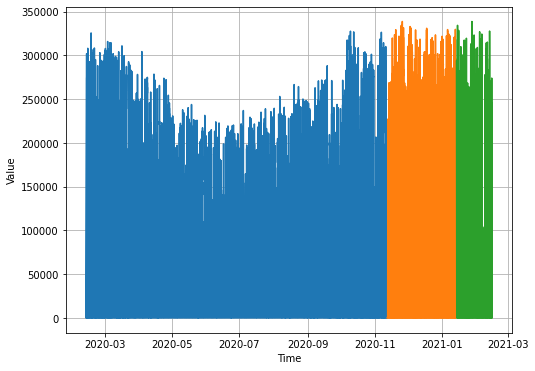

In [15]:
util.plot_multiple_series([train_df.index, val_df[int(n * 0.7):].index, test_df[int(n * 0.9):].index],
                          [train_df['grid'].values, val_df[int(n * 0.7):]['grid'].values,
                          test_df[int(n * 0.9):]['grid'].values])

Plot the new time series

In [27]:
solar_ts= pd.read_pickle('../input/solar_timeseries')

Round the values

In [13]:
solar_ts_rounded = solar_ts.round(2)

In [14]:
solar_ts_rounded['grid'].values.tolist()

[12.8,
 11.25,
 12.45,
 13.47,
 13.1,
 12.67,
 13.71,
 12.26,
 12.83,
 12.97,
 12.15,
 13.14,
 12.64,
 12.6,
 12.48,
 13.41,
 13.87,
 10.43,
 11.84,
 8.75,
 5.39,
 5.5,
 4.19,
 6.38,
 6.15,
 6.03,
 418.66,
 2179.73,
 4431.15,
 6597.88,
 8473.98,
 10257.35,
 13318.99,
 17090.77,
 19060.1,
 20880.01,
 24333.62,
 29784.21,
 33457.33,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 96326.96,
 102678.68,
 108153.52,
 113564.5,
 121785.17,
 128662.34,
 135312.98,
 141471.43,
 147704.93,
 154187.22,
 160854.8,
 167233.62,
 172836.5,
 178510.46,
 183968.33,
 189303.24,
 195185.47,
 200434.11,
 206625.63,
 210311.84,
 213321.67,
 215882.5,
 215689.57,
 225242.72,
 233369.54,
 237130.58,
 235492.52,
 241056.43,
 247485.64,
 243320.19,
 238834.15,
 256533.78,
 259707.59,
 265125.33,
 266040.3,
 273406.87,
 275565.82,
 278008.55,
 279496.99,
 281517.98,
 284556.15,
 284331.17,
 289412.76,
 291745.42,
 292435.23,
 273398.68,
 286645.76,
 287513.44,
 293449.97,
 298828.09,
 295250

In [23]:
solar_ts_rounded.to_pickle('../input/solar_timeseries')
solar_ts_rounded.to_csv('../input/solar_timeseries.csv')

In [15]:
data = pd.read_pickle('../input/timeseries')

In [22]:
# data['tline_1'].values.tolist()

In [28]:
plot_solar = solar_ts[['grid']].rename(columns ={'grid':'solar_time'})
plot_data = pd.concat([plot_solar, data[['grid']]], axis=1)

In [29]:
fig = go.Figure()
data_size_to_plot = 5000
fig.add_trace(go.Scatter(x=plot_data.index[:data_size_to_plot], y = plot_data['solar_time'][:data_size_to_plot], 
                         name = 'solar time data'))